# Demonstration of using `basmati` to get basins for GB/Ireland

* basmati: https://github.com/markmuetz/basmati
* paper which describes HydroBASINS data and basmati (Sect. 2.4): https://hess.copernicus.org/articles/25/6381/2021/hess-25-6381-2021.html

Assumes basmati correctly set up, and EU data has been downloaded.

In [1]:
import os

import cartopy.crs as ccrs 
import matplotlib.pyplot as plt

from basmati.hydrosheds import load_hydrobasins_geodataframe

In [2]:
# Load data. Load levels 1-8. (12 is the finest level with the smallest basins).
hydrosheds_dir = '/home/markmuetz/HydroSHEDS2'
hb_gdf = load_hydrobasins_geodataframe(hydrosheds_dir, 'eu', range(1, 9))

In [3]:
# hb_gdf is a geopandas dataframe with the hydrobasins data in it.
# geopandas dataframes have a special column: geometry, that contains the spatial data about each dataframe
# and can be used to perform operations on the data.
hb_gdf

,HYBAS_ID,NEXT_DOWN,NEXT_SINK,MAIN_BAS,DIST_SINK,DIST_MAIN,SUB_AREA,UP_AREA,PFAF_ID,ENDO,COAST,ORDER,SORT,geometry,LEVEL,PFAF_STR
0,2010000010,0,2010000010,2010000010,0.0,0.0,17858904.0,17858904.0,2,0,1,0,1,"MULTIPOLYGON (((33.12361 31.20833, 33.11773 31...",1,2
1,2020000010,0,2020000010,2020000010,0.0,0.0,1272334.2,1272334.2,21,0,1,0,1,"MULTIPOLYGON (((19.29028 40.47083, 19.28003 40...",2,21
2,2020003440,0,2020003440,2020003440,0.0,0.0,2465296.7,2465296.7,22,0,1,0,2,"MULTIPOLYGON (((38.44028 40.92500, 38.43416 40...",2,22
3,2020018240,0,2020018240,2020018240,0.0,0.0,1555658.9,1555658.9,23,0,1,0,3,"MULTIPOLYGON (((-8.73472 38.50000, -8.74084 38...",2,23
4,2020024230,0,2020024230,2020024230,0.0,0.0,1772347.5,1772347.5,24,0,1,0,4,"MULTIPOLYGON (((23.27361 57.77917, 23.24784 57...",2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36344,2080109350,0,2080109350,2080109350,0.0,0.0,58.0,58.0,21309705,2,0,1,25311,"POLYGON ((15.35833 44.37083, 15.35480 44.37174...",8,21309705
36345,2080109520,0,2080109520,2080109520,0.0,0.0,11.6,11.7,29810908,2,0,1,25312,"POLYGON ((48.15000 27.00000, 48.15035 27.00659...",8,29810908
36346,2080109860,2080411370,2080109860,2080023010,0.0,381.2,10.9,10.9,23261090,2,0,2,25313,"POLYGON ((7.24167 50.40417, 7.24167 50.40833, ...",8,23261090
36347,2080110090,0,2080110090,2080110090,0.0,0.0,10.3,10.3,29880039,2,0,1,25314,"POLYGON ((39.50000 29.53333, 39.50069 29.54502...",8,29880039


<AxesSubplot:>

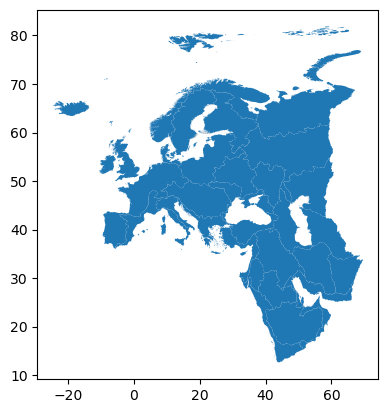

In [4]:
# Select level 3 to get a feel for the data. These are the largest basins within a region.
hb_gdf3 = hb_gdf[hb_gdf.LEVEL == 3]
# For some reason, geopandas and cartopy do not work together when trying to plot all of Europe at level 3.
# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ax.coastlines()
fig, ax = plt.subplots()
hb_gdf3.plot(ax=ax)

/tmp/ipykernel_13924/3632272226.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


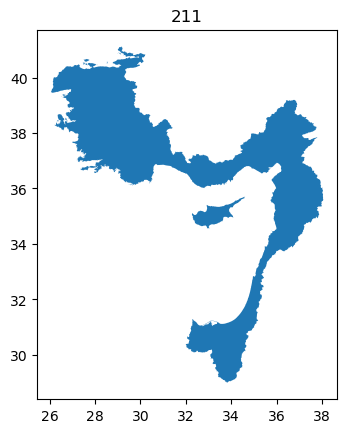

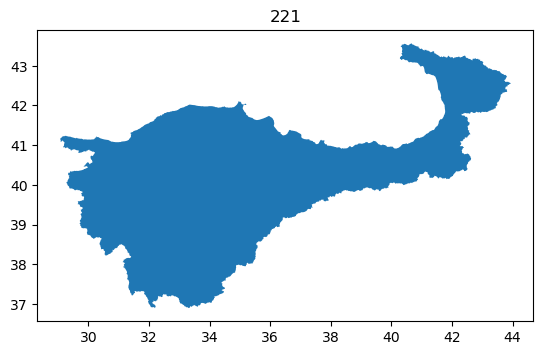

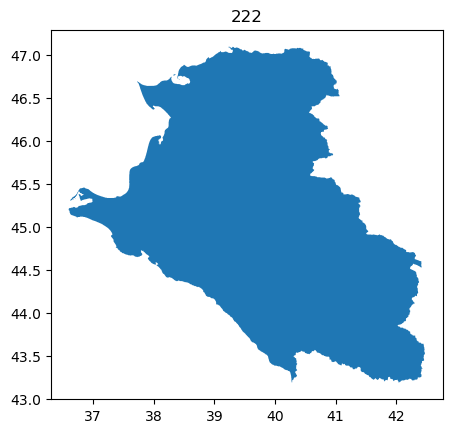

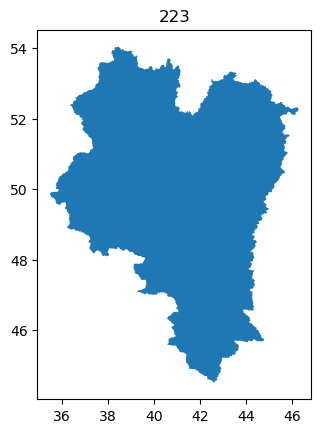

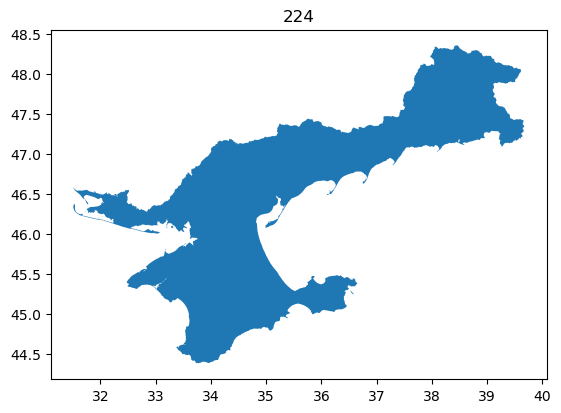

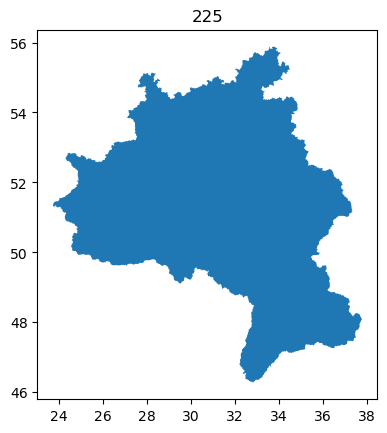

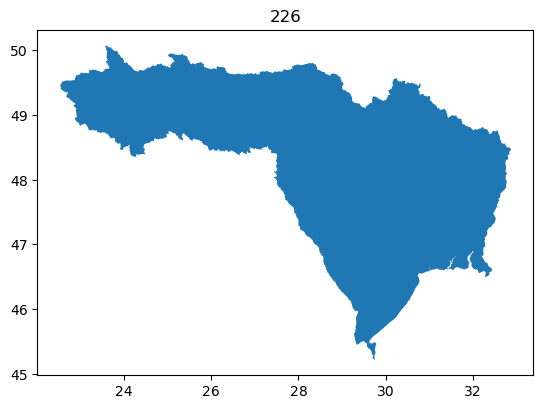

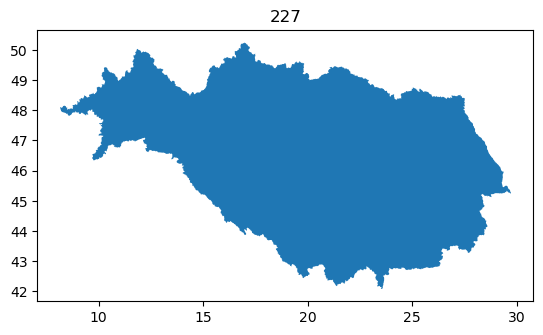

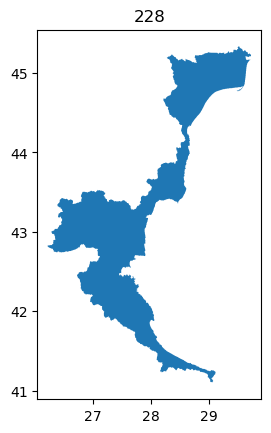

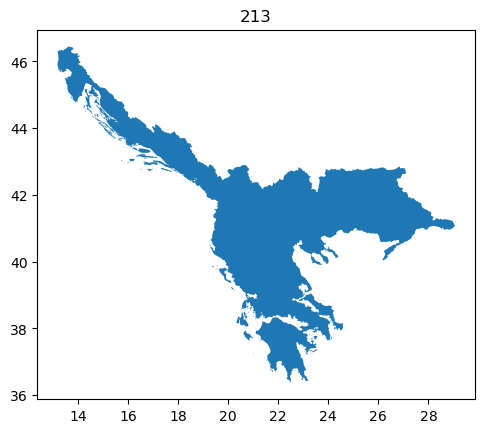

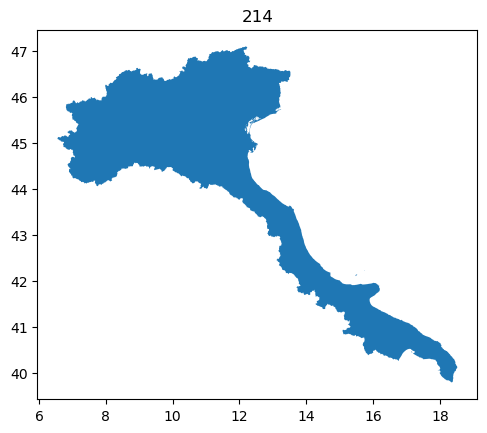

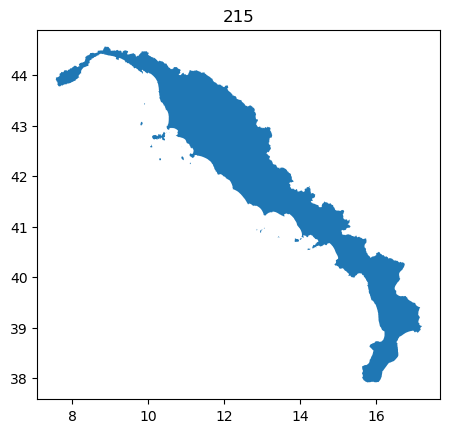

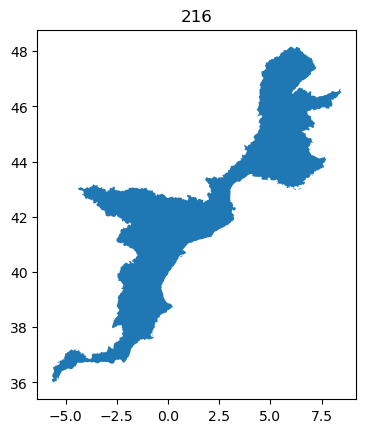

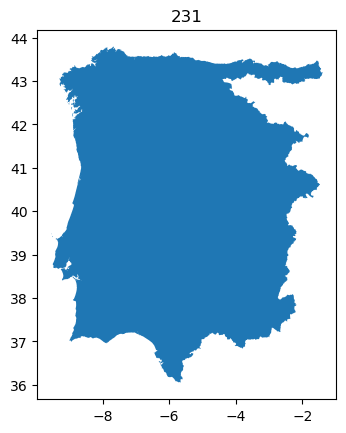

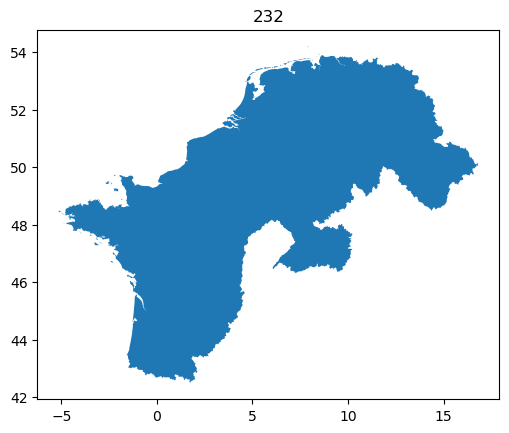

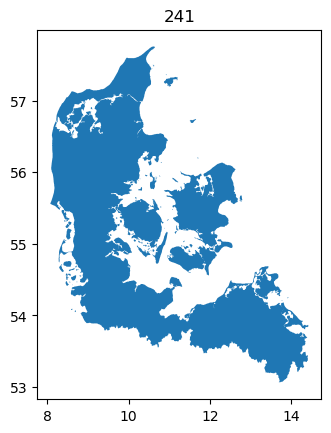

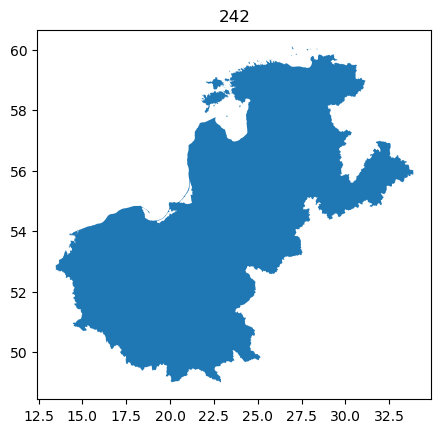

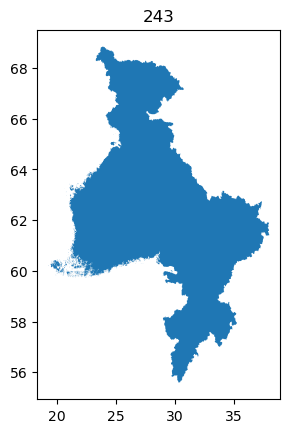

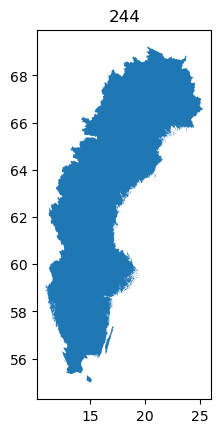

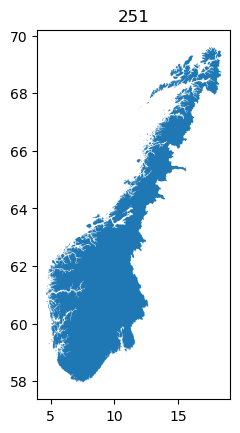

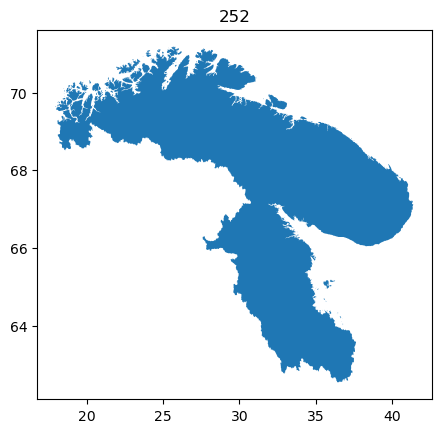

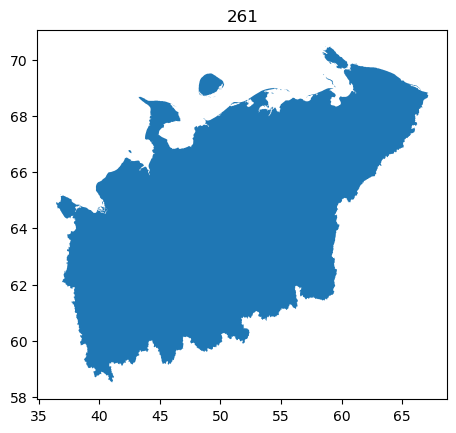

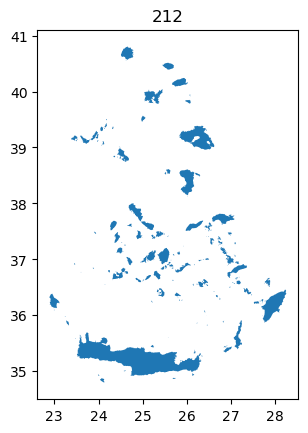

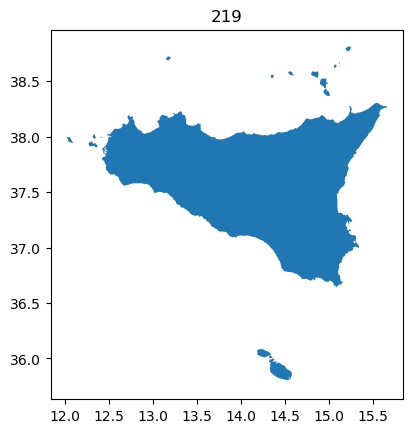

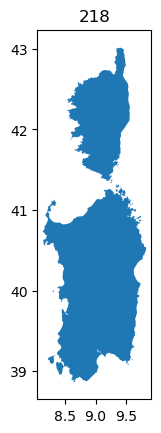

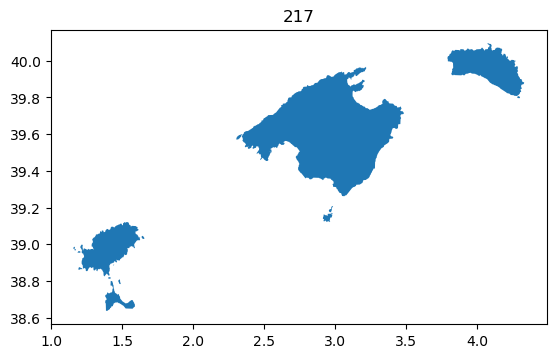

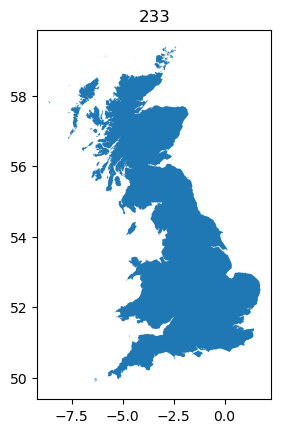

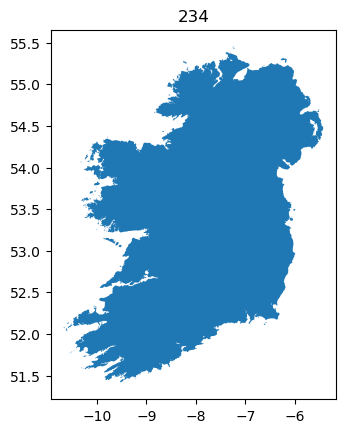

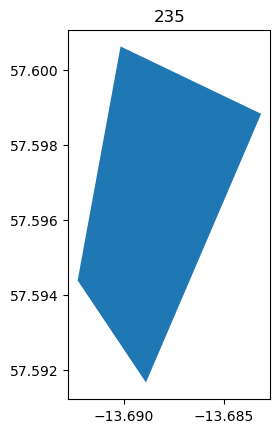

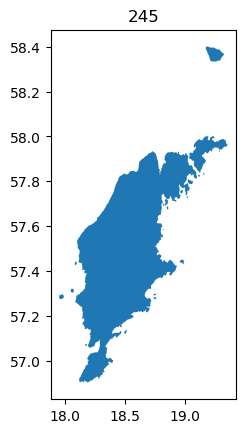

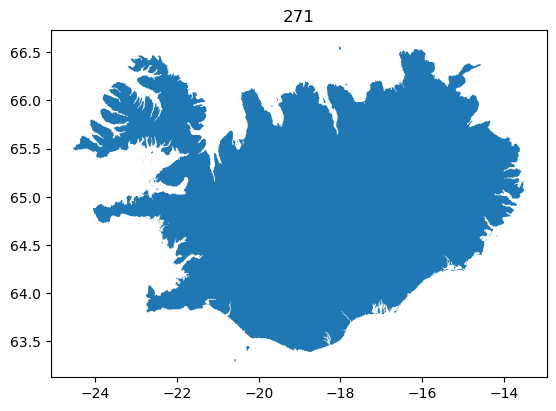

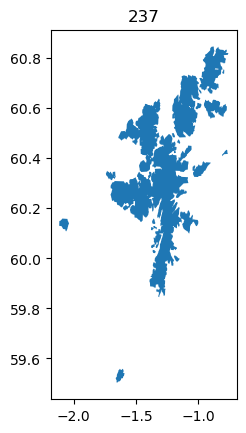

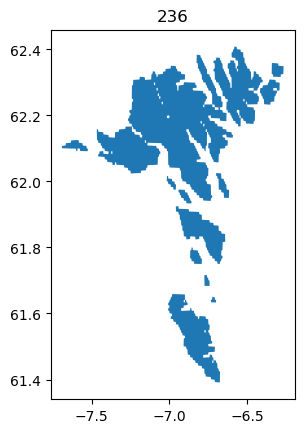

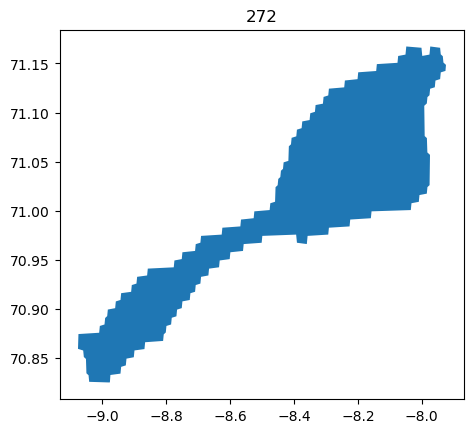

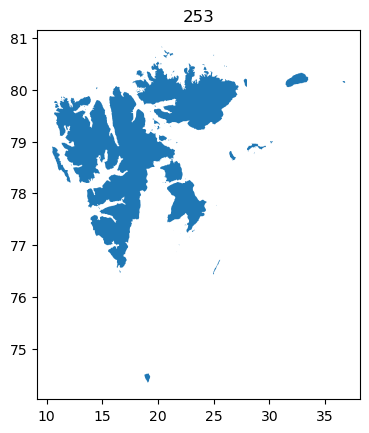

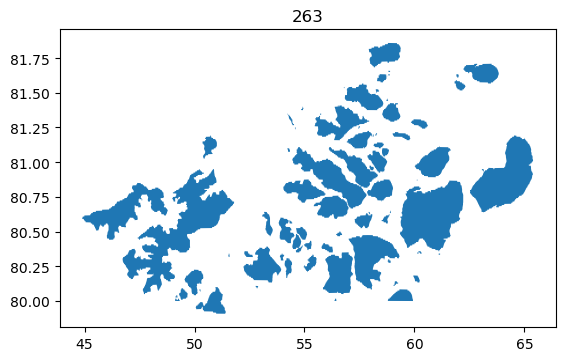

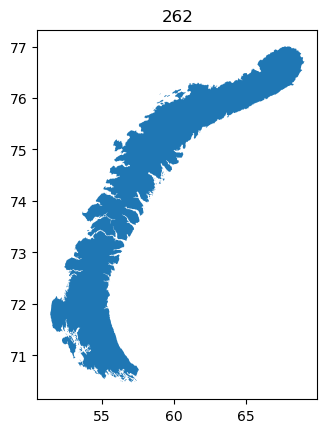

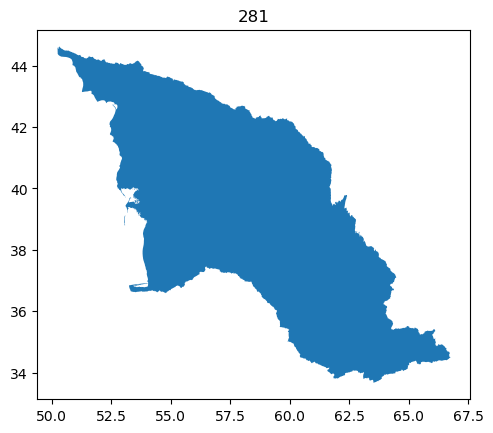

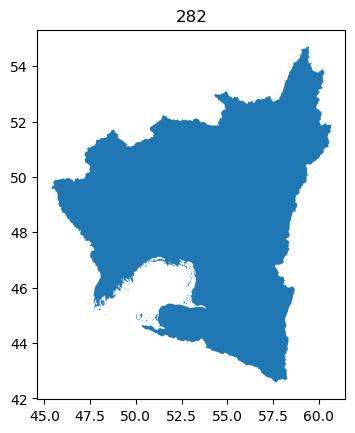

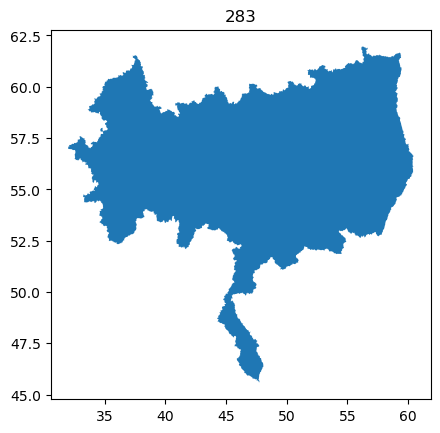

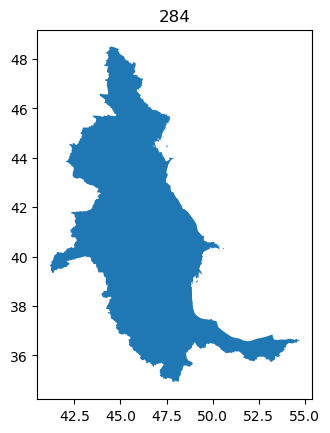

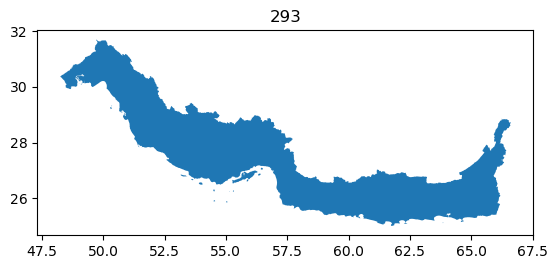

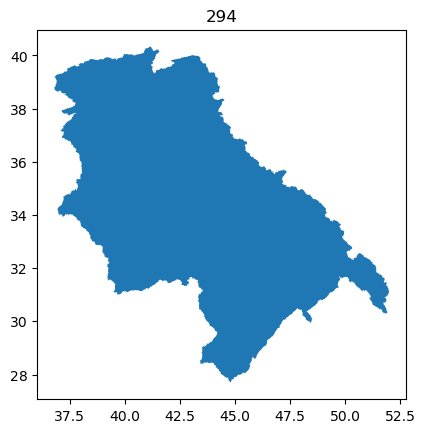

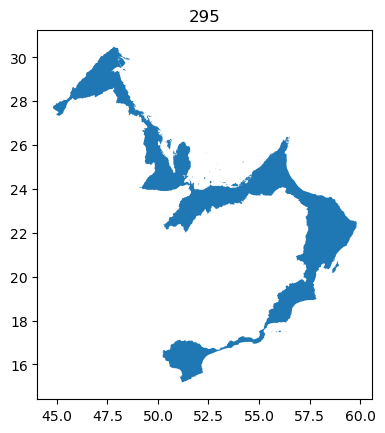

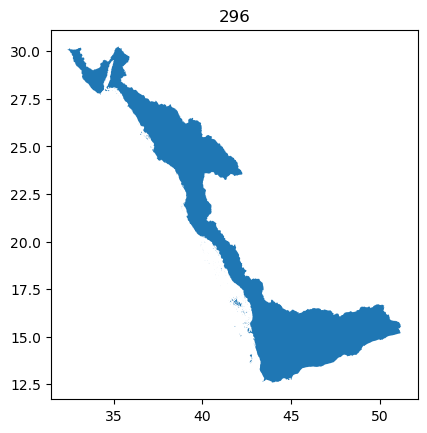

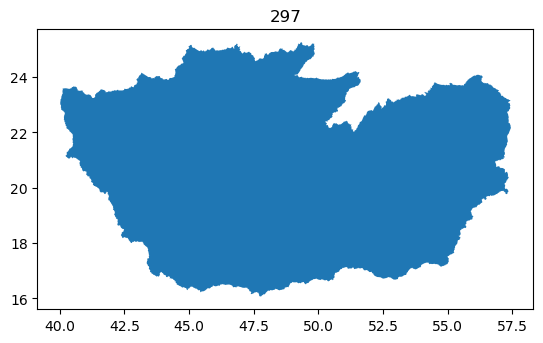

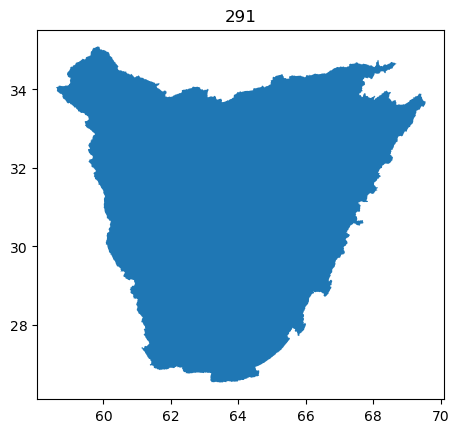

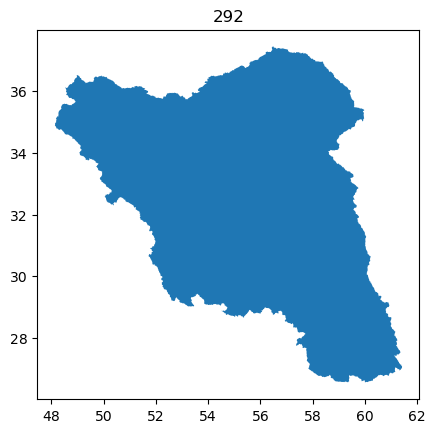

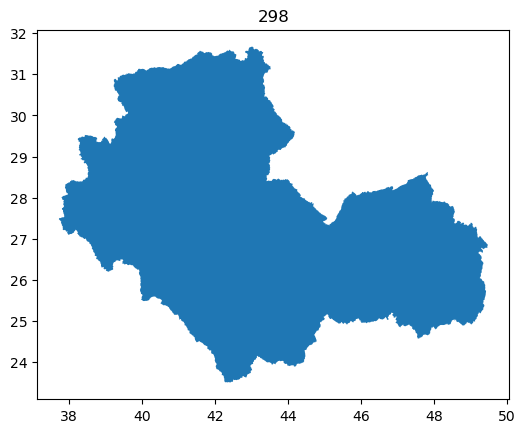

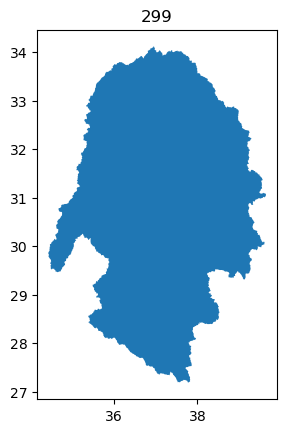

In [5]:
# Find which Pfafstetter code corresponds to UK/Ireland
hb_gdf_lev = hb_gdf[hb_gdf.LEVEL == 3]
for ps in hb_gdf_lev.PFAF_STR:
    fig, ax = plt.subplots()
    ax.set_title(ps)
    hb_gdf_lev[hb_gdf_lev.PFAF_STR == ps].plot(ax=ax)

In [6]:
hb_gdf_gb = hb_gdf[hb_gdf.PFAF_STR.str.startswith('233')]  # technically GB and islands.
hb_gdf_ir = hb_gdf[hb_gdf.PFAF_STR.str.startswith('234')]  # Island of Ireland, and islands.

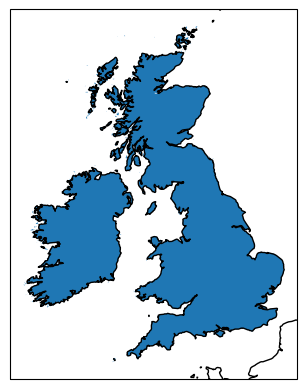

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
hb_gdf_gb[hb_gdf_gb.LEVEL == 3].plot(ax=ax)
hb_gdf_ir[hb_gdf_ir.LEVEL == 3].plot(ax=ax)
ax.coastlines('10m')

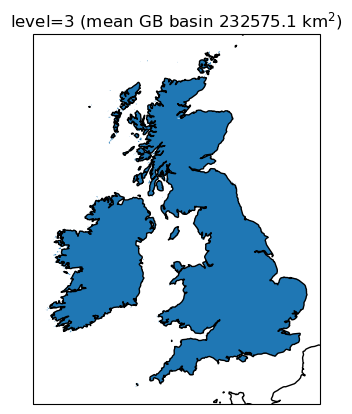

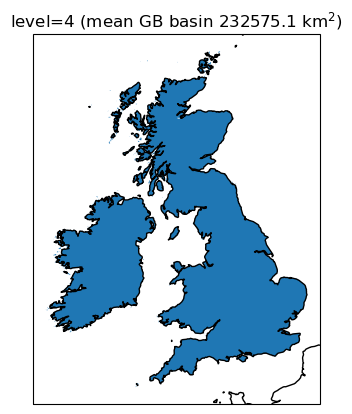

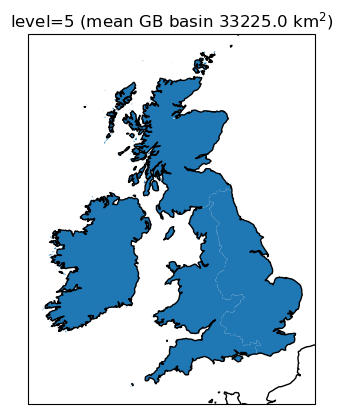

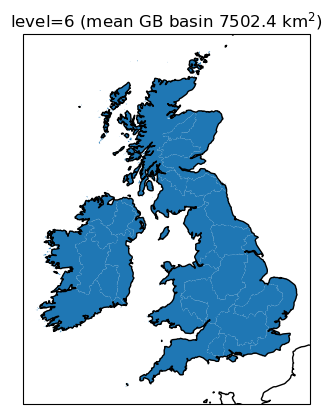

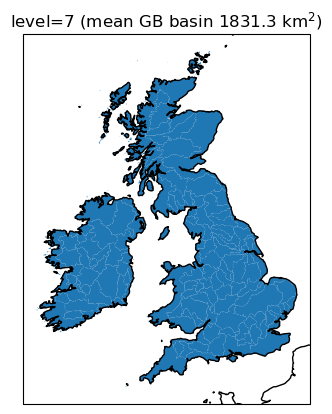

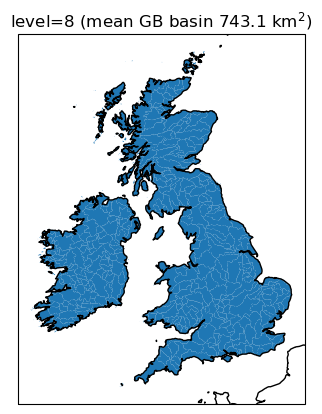

In [8]:
# Look at levels 3-8 to get a feel for the size of the basins.
for level in range(3, 9):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    hb_gdf_gb[hb_gdf_gb.LEVEL == level].plot(ax=ax)
    hb_gdf_ir[hb_gdf_ir.LEVEL == level].plot(ax=ax)
    mean_area = hb_gdf_gb[hb_gdf_gb.LEVEL == level].SUB_AREA.mean()
    ax.coastlines('10m')
    ax.set_title(f'level={level} (mean GB basin {mean_area:.1f} km$^{2}$)')

## Create a raster based on an ERA5 CAPE dataset

In [9]:
import xarray as xr
from basmati.utils import build_raster_from_lon_lat, build_weights_from_lon_lat

In [10]:
# Load an ERA5 CAPE file (0.25deg resolution).
e5 = xr.open_dataarray('ecmwf-era5_oper_an_sfc_202001010000.cape.nc')

In [11]:
e5

<xarray.DataArray 'cape' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [12]:
# Tricky to work with lon=0-360 data over GB - change to -180-180
e5 = e5.assign_coords(longitude=((e5.longitude + 180) % 360) - 180)
e5 = e5.roll(longitude=720, roll_coords=True)

In [13]:
e5

<xarray.DataArray 'cape' (time: 1, latitude: 721, longitude: 1440)>
array([[[1.0095215 , 1.0095215 , 1.0095215 , ..., 1.0095215 ,
         1.0095215 , 1.0095215 ],
        [1.1538086 , 1.1538086 , 1.1538086 , ..., 1.1538086 ,
         1.1538086 , 1.1538086 ],
        [1.0095215 , 1.0095215 , 1.0095215 , ..., 1.0095215 ,
         1.0095215 , 1.0095215 ],
        ...,
        [0.14404297, 0.14404297, 0.14404297, ..., 0.14404297,
         0.14404297, 0.14404297],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2020-01-01
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [14]:
# Select GB
minlon, minlat = -12, 49
maxlon, maxlat = 2, 61
e5gb = e5.sel(longitude=slice(minlon, maxlon), latitude=slice(maxlat, minlat))

In [15]:
e5gb

<xarray.DataArray 'cape' (time: 1, latitude: 49, longitude: 57)>
array([[[16.513672 , 14.999268 , 12.40332  , ..., 19.398193 ,
         20.624023 , 22.282715 ],
        [15.6484375, 14.134033 , 14.638672 , ..., 11.8984375,
         13.124512 , 14.134033 ],
        [15.359863 , 15.720459 , 18.100098 , ...,  4.6152344,
          5.26416  ,  6.3459473],
        ...,
        [20.47998  , 13.124512 , 13.62915  , ...,  1.1538086,
          0.2163086,  0.2163086],
        [ 9.735107 , 21.128906 , 21.489502 , ...,  1.3701172,
          0.5046387,  0.5046387],
        [14.350342 , 32.017822 , 39.229248 , ...,  1.0095215,
          0.3605957,  0.3605957]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -12.0 -11.75 -11.5 -11.25 ... 1.5 1.75 2.0
  * latitude   (latitude) float32 61.0 60.75 60.5 60.25 ... 49.5 49.25 49.0
  * time       (time) datetime64[ns] 2020-01-01
Attributes:
    units:      J kg**-1
    long_name:  Convective available potential energy

In [16]:
hb_gdf_gbir6 = hb_gdf[(hb_gdf.PFAF_STR.str.startswith('233') | hb_gdf.PFAF_STR.str.startswith('234')) & (hb_gdf.LEVEL == 6)]
# Use basmati to create a raster to match this.
raster = build_raster_from_lon_lat(hb_gdf_gbir6.geometry, minlon, maxlon, minlat, maxlat, 57, 49)

In [17]:
import matplotlib.pyplot as plt

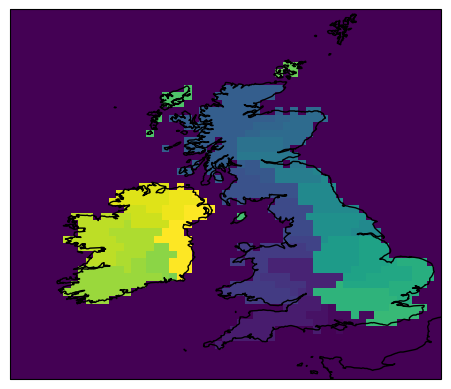

In [18]:
# Make a figure showing the raster data. Each basin is assigned an integer up to the number of basins.
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.imshow(raster, origin='lower', extent=(minlon, maxlon, minlat, maxlat))
ax.coastlines()

In [19]:
# Check max basin id in raster matches number of basins:
print(raster.max())
print(len(hb_gdf_gbir6))

40
40


Number of gridpoints in basin 7: 46
Mean CAPE: 0.020359205082058907 J kg-1


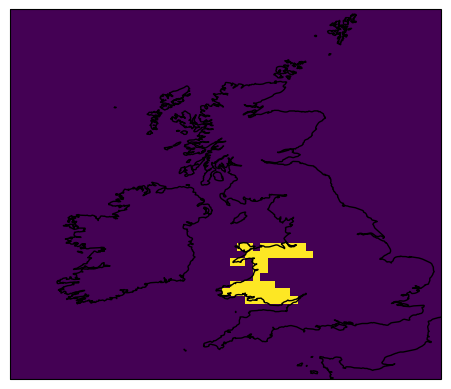

In [20]:
# Use raster to select out CAPE for basin 7:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.imshow(raster == 7, origin='lower', extent=(minlon, maxlon, minlat, maxlat))
ax.coastlines()
print(f'Number of gridpoints in basin 7: {(raster == 7).sum()}')
print(f'Mean CAPE: {e5gb.values[0][raster == 7].mean()} J kg-1')

In [21]:
# Show difference between raster/weights.
weights = build_weights_from_lon_lat(hb_gdf_gbir6.geometry, minlon, maxlon, minlat, maxlat, 57, 49)

Sum of gridpoints weights in basin 7: 42.31999999999999
Mean CAPE: 0.017465400335243388 J kg-1


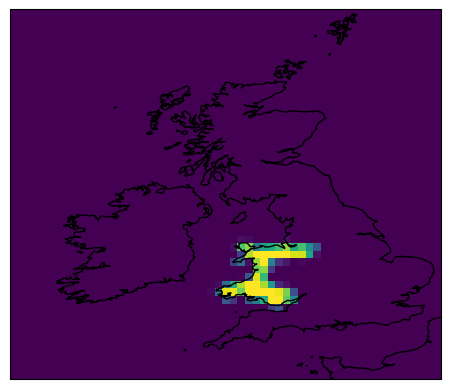

In [22]:
# Weights are stored in a 3D cube, with first axis being number of basins.
# Note, can have values in range 0-1, and so can select out values from coarser datasets more accurately.
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.imshow(weights[6], origin='lower', extent=(minlon, maxlon, minlat, maxlat))
ax.coastlines()
print(f'Sum of gridpoints weights in basin 7: {weights[6].sum()}')
print(f'Mean CAPE: {(e5gb.values[0] * weights[6]).sum() / weights[6].sum()} J kg-1')

In [23]:
# raster/weights can easily be saved:
da_raster = xr.DataArray(raster, dims=['latitude', 'longitude'], coords=dict(latitude=e5gb.latitude, longiutde=e5gb.longitude))
da_weights = xr.DataArray(weights, dims=['basins', 'latitude', 'longitude'], coords=dict(basins=range(weights.shape[0]), latitude=e5gb.latitude, longiutde=e5gb.longitude))

In [24]:
da_raster.to_netcdf('da_raster.nc')
da_weights.to_netcdf('da_weights.nc')